# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Data Processing

In [2]:
df = pd.read_csv("creditcard_2023.csv")
df = df.drop(columns='id')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


Class
0    284315
1    284315
Name: count, dtype: int64


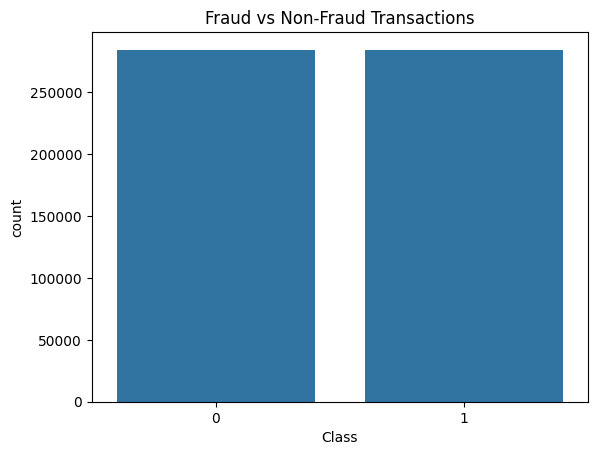

In [4]:
# Checking the class distribution
print(df['Class'].value_counts())

# Plot class distribution
sns.countplot(x=df['Class'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

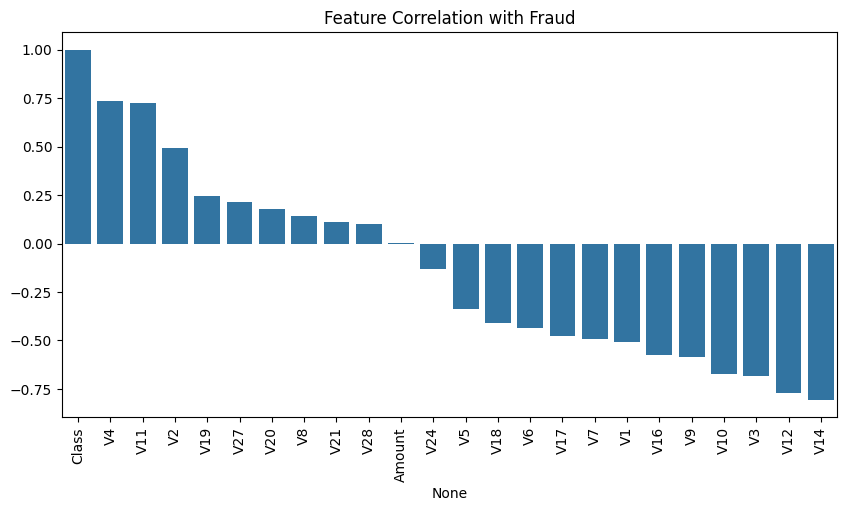

In [8]:
# Compute correlation with 'Class' (Fraud = 1, Non-Fraud = 0)
correlation = df.corr()['Class'].sort_values(ascending=False)

# Plot correlation heatmap
plt.figure(figsize=(10,5))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.title("Feature Correlation with Fraud")
plt.show()


In [7]:
weak_features = correlation[(correlation > -0.1) & (correlation < 0.1)].index.tolist()
print(weak_features)
df = df.drop(['V26', 'V25', 'V22', 'V23','V15', 'V13'],axis='columns')

['V26', 'V25', 'V22', 'V23', 'Amount', 'V15', 'V13']


## How to Detect Outliers?

### If max is much larger than 75% percentile, there are possible outliers.
### If std (standard deviation) is very high, there may be extreme values.

In [9]:
# Compute IQR 
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

In [10]:
from scipy import stats

# Define Z-score threshold (commonly 3)
z_thresh = 3

# Select only V1 to V28
pca_columns = [col for col in df.columns if col.startswith('V')]

# Compute Z-score and filter out extreme values
df = df[(stats.zscore(df[pca_columns]) < z_thresh).all(axis=1)]


In [11]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V17,V18,V19,V20,V21,V24,V27,V28,Amount,Class
count,520471.000000,520471.000000,520471.000000,520471.000000,520471.000000,520471.000000,520471.000000,520471.000000,520471.000000,520471.000000,...,520471.000000,520471.000000,520471.000000,520471.000000,520471.000000,520471.000000,520471.000000,520471.000000,520471.000000,520471.000000
mean,0.122323,-0.111796,0.103587,-0.075780,0.065951,0.046663,0.100631,-0.015221,0.046070,0.052456,...,0.014300,0.029542,0.017450,-0.054429,0.005876,0.005558,-0.038530,0.001992,12043.906963,0.473152
std,0.899444,0.699051,0.900924,0.957776,0.731292,0.847827,0.719148,0.461661,0.883283,0.846088,...,0.871587,0.906494,0.967850,0.630052,0.380000,0.988364,0.757358,0.760789,6918.306675,0.499279
min,-2.184222,-11.895382,-2.206922,-4.951222,-2.560038,-3.271472,-3.083745,-3.469713,-2.740952,-2.515992,...,-2.484938,-2.421949,-4.931303,-10.318006,-3.953962,-4.067968,-4.813202,-11.270587,50.010000,0.000000
25%,-0.450582,-0.500966,-0.549911,-0.694026,-0.218533,-0.353009,-0.180556,-0.185588,-0.456919,-0.504310,...,-0.528548,-0.427075,-0.550832,-0.350762,-0.159681,-0.636761,-0.303288,-0.223106,6057.275000,0.000000
50%,-0.047063,-0.170585,0.058722,-0.140388,0.105672,0.103195,0.259613,-0.113050,0.123256,0.313343,...,0.286524,0.113784,-0.027871,-0.138515,-0.038533,-0.000709,-0.182159,-0.022008,12031.670000,0.000000
75%,0.896516,0.220607,0.674078,0.600576,0.442889,0.494876,0.530548,0.037088,0.573363,0.602608,...,0.517806,0.548026,0.558934,0.184883,0.126032,0.726818,0.263647,0.345256,18040.305000,1.000000
max,2.229046,2.873960,2.999888,2.353025,2.999979,2.999999,2.999241,2.999796,2.999994,2.999412,...,2.999522,2.999900,2.999672,2.999809,2.998051,2.984014,3.000000,2.999923,24039.930000,1.000000


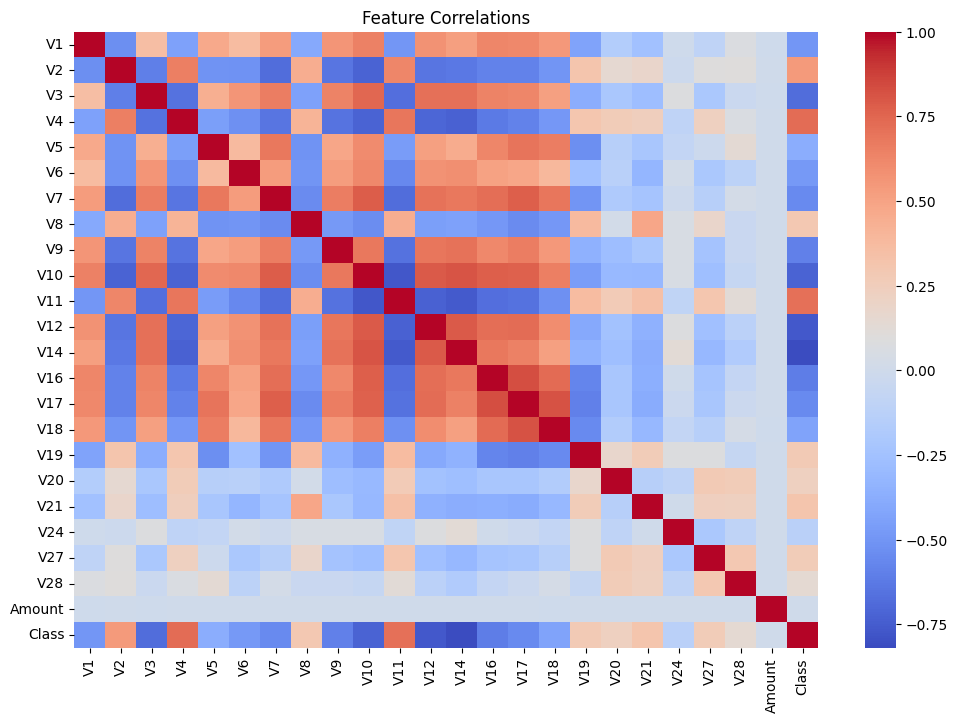

Class     1.000000
V14       0.819838
V12       0.766601
V4        0.728507
V10       0.721889
V11       0.715018
V3        0.681601
V16       0.611150
V9        0.594392
V17       0.552846
V7        0.552046
V2        0.539366
V1        0.497944
V6        0.481276
V18       0.435716
V5        0.378656
V21       0.313833
V8        0.289651
V19       0.280317
V27       0.260738
V20       0.227420
V28       0.141881
V24       0.125553
Amount    0.002570
Name: Class, dtype: float64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlations")
plt.show()

# Find top correlated features with Class
corr_with_class = corr['Class'].abs().sort_values(ascending=False)
print(corr_with_class)


In [13]:
df = df.drop(columns=['V14', 'V12','V4', 'V10', 'V11','V3'])

In [14]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [15]:
X = df.drop(columns=['Class'])
y = df.Class

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [17]:
print(len(X_train),len(X_test))

364329 156142


# Model Training

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss, accuracy_score

# Use best hyperparameters (previously found)
best_params = {
    'n_estimators': 10,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 3
}

# Train model with best parameters
model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

# Predict on both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Probabilities for log loss calculation
y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# Compute metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_loss = log_loss(y_train, y_train_prob)
test_loss = log_loss(y_test, y_test_prob)

# Print results
print(f"✅ Training Accuracy: {(train_accuracy)*100:.4f}")
print(f"✅ Testing Accuracy: {(test_accuracy)*100:.4f}")
print(f"🔴 Training Loss: {(train_loss)*100:.4f}")
print(f"🔵 Testing Loss: {(test_loss)*100:.4f}")

# Classification report
print("\n📊 Classification Report (Test Set):\n", classification_report(y_test, y_test_pred))



✅ Training Accuracy: 99.9835
✅ Testing Accuracy: 99.9494
🔴 Training Loss: 0.4989
🔵 Testing Loss: 1.0463

📊 Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     82376
           1       1.00      1.00      1.00     73766

    accuracy                           1.00    156142
   macro avg       1.00      1.00      1.00    156142
weighted avg       1.00      1.00      1.00    156142



In [21]:
import pandas as pd
feature_importances = model.feature_importances_
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)  


   Feature  Importance
8      V17    0.268942
7      V16    0.184936
1       V2    0.082761
12     V21    0.081941
4       V7    0.080605
6       V9    0.060025
0       V1    0.041069
10     V19    0.030431
14     V27    0.030376
9      V18    0.026170
3       V6    0.023565
5       V8    0.021745
2       V5    0.019403
11     V20    0.018645
15     V28    0.016699
13     V24    0.012536
16  Amount    0.000150


In [22]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")


Cross-validation scores: [0.99927264 0.99949222 0.99921774 0.99927264 0.99945104]
Mean CV accuracy: 0.9993


In [23]:
from sklearn.utils import resample
X_train_small, y_train_small = resample(X_train, y_train, n_samples=int(len(X_train) * 0.5), random_state=42)
model.fit(X_train_small, y_train_small)
print(f"New Test Accuracy: {accuracy_score(y_test, model.predict(X_test)):.4f}")


New Test Accuracy: 0.9984
